Extracting ./mnist/data\train-images-idx3-ubyte.gz
Extracting ./mnist/data\train-labels-idx1-ubyte.gz
Extracting ./mnist/data\t10k-images-idx3-ubyte.gz
Extracting ./mnist/data\t10k-labels-idx1-ubyte.gz
Repeat: 0001 avg loss 0.5079
Learn Complete
Repeat: 0002 avg loss 0.2033
Learn Complete
Repeat: 0003 avg loss 0.1352
Learn Complete
Repeat: 0004 avg loss 0.1013
Learn Complete
Repeat: 0005 avg loss 0.0778
Learn Complete
Repeat: 0006 avg loss 0.0632
Learn Complete
Repeat: 0007 avg loss 0.0495
Learn Complete
Repeat: 0008 avg loss 0.0385
Learn Complete
Repeat: 0009 avg loss 0.0328
Learn Complete
Repeat: 0010 avg loss 0.0262
Learn Complete


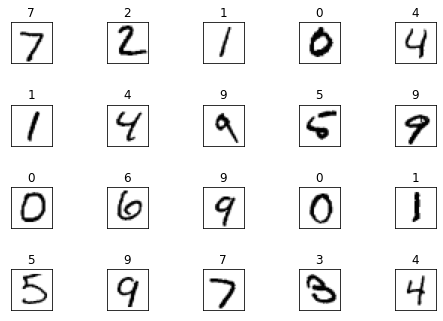

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data", one_hot=True)

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([784,256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))

W2 = tf.Variable(tf.random_normal([256,64], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))

W3 = tf.Variable(tf.random_normal([64,10], stddev=0.01))
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))

optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)


init  = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range (10):
    total_cost = 0
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_x, Y:batch_y})
        total_cost+= cost_val
    print('Repeat:', '%04d' % (epoch + 1), 'avg loss', '{:.4f}'.format(total_cost/total_batch))

    print('Learn Complete')
    
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

labels = sess.run(model, feed_dict={X:mnist.test.images, Y:mnist.test.labels})

fig = plt.figure()
fig.subplots_adjust(left=0, bottom=0, right = 1, top = 1, wspace = 1, hspace =1)
for i in range(20):
    subplot = fig.add_subplot(4, 5, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28, 28)),cmap=plt.cm.gray_r)


plt.show()